In [432]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statistics import mean
from statistics import stdev
import math
from sklearn.model_selection import train_test_split
import random
warnings.filterwarnings('ignore')

# Question 1

## Task 1 : Loading of Data and Pre-processing

In [433]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [434]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we can see, we have some missing data points in the data

In [436]:
df.isna().sum()/df.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In the Age Column, Approximately 20% of the data is missing.
Majority of the data is missing in the Cabin Column.
A very small fraction of data is missing in the Embarked Column.

Age is a significant factor concerning one's survival. So we cannot simply drop 20% of the data simply because we don't have data. We will fill the NaN values in the Age column with the Average Age of a person in the same category in the entire dataset.

In [437]:
print(round(df.groupby(['Sex', 'Pclass'])['Age'].agg(['mean']), 0))#age

               mean
Sex    Pclass      
female 1       35.0
       2       29.0
       3       22.0
male   1       41.0
       2       31.0
       3       27.0


In [438]:
df["Age"] = df["Age"].fillna(-1)
for data_index in range(df.shape[0]):
  if df["Age"][data_index] == -1:
    if ((df["Sex"][data_index] == "female") and (df["Pclass"][data_index] == 1)):
      df["Age"][data_index] = 35
    elif((df["Sex"][data_index] == "female") and (df["Pclass"][data_index] == 2)):
      df["Age"][data_index] = 29
    elif((df["Sex"][data_index] == "female") and (df["Pclass"][data_index] == 3)):
      df["Age"][data_index] = 22
    elif((df["Sex"][data_index] == "male") and (df["Pclass"][data_index] == 1)):
      df["Age"][data_index] = 41
    elif((df["Sex"][data_index] == "male") and (df["Pclass"][data_index] == 2)):
      df["Age"][data_index] = 31
    elif((df["Sex"][data_index] == "male") and (df["Pclass"][data_index] == 3)):
      df["Age"][data_index] = 27

In [439]:
df.isna().sum()/df.shape[0] * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

A Cabin Alloted to a person cannot affect his chances of Survival. So simply dropping the Cabin Column is no harm.

In [440]:
df = df.drop(columns = ["Cabin"])

In the Embarked Column, we have exactly 2 NaN values. Since it is an insignificant portion of the data, we simply drop all the NaN values.

In [441]:
df = df.dropna()

In [442]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Dropping Redundant Columns:
Passenger Id : This is just an indexing given to the  dataset. We simply drop it.

Name : Name of a person is merely an identifier. Inbuilt indexing in numpy and pandas can be used as an identifier of the person. So we also drop the Name Column due to Redundacny.

Ticket : There is no significant piece of information in the Ticket ID of a person. The Data is irrelevant. Hence Dropped.

In [443]:
df.drop(columns = ["PassengerId", "Name", "Ticket",], inplace = True)

After Cleaning the Data we now move on to CATEGORICAL ENCODING.

In [444]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


'male' is encoded as 1 and
'female' is encoded as 0

In [445]:
df["Sex"].replace("male",1,inplace = True)
df["Sex"].replace("female",0,inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


The Place from where the Person has embarked is encoded as Follow



In [446]:
df["Embarked"].replace("S",0,inplace = True)
df["Embarked"].replace("C",1,inplace = True)
df["Embarked"].replace("Q",2,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


Rearranging the Columns of the Dataset, we finally have the data we can work with.

In [447]:
df = df[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Survived"]]
df.head()
# type(df.columns[6])

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,0,0
1,1,0,38.0,1,0,71.2833,1,1
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,0


<Axes: xlabel='Survived', ylabel='Fare'>

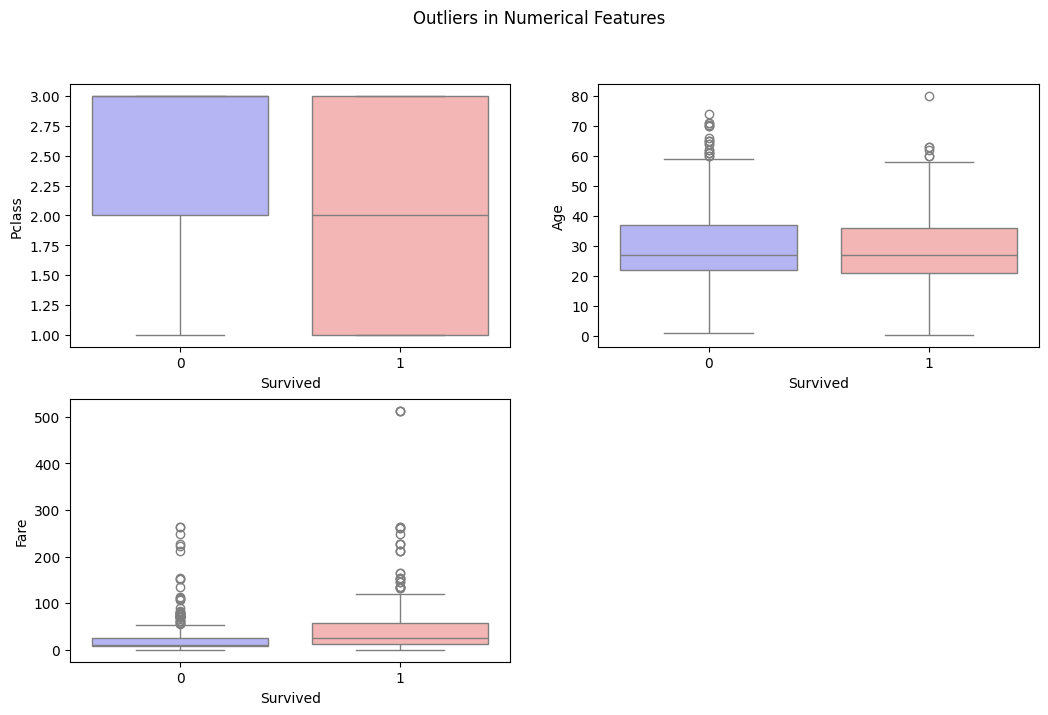

In [448]:
figure, axes = plt.subplots(2, 2, figsize = (12.5, 7.5))
figure.suptitle("Outliers in Numerical Features")
figure.delaxes(axes[1][1])

sns.boxplot(ax = axes[0, 0], data = df, x = "Survived", y = "Pclass", palette = "bwr")
sns.boxplot(ax = axes[0, 1], data = df, x = "Survived", y = "Age", palette = "bwr")
sns.boxplot(ax = axes[1, 0], data = df, x = "Survived", y = "Fare", palette = "bwr")

The analysis of these plots leads to the following observations:

Pclass: This particular feature encompasses only three discrete values.


*   Age: The plots reveal data points exceeding 60, which signifies the presence of elderly individuals on the ship rather than outliers. Thus, it is deemed relevant.
*   Fare: The plot displays substantial fare values, which is deemed reasonable. Therefore, it is also taken into consideration.
*   Pclass: With only three discrete values (1, 2, and 3), no outliers are identified.

In summary, based on the above considerations, it can be concluded that there are no significant outliers present in the given dataset.

Perfoming Splitting of dataset using 70-20-10 split.

In [449]:
random.seed(0)
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values.reshape(-1,1)
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=.1,random_state = 13)
X_train,X_val,Y_train,Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.2222,random_state = 42)

Data Visualization

<Axes: xlabel='Survived', ylabel='Embarked'>

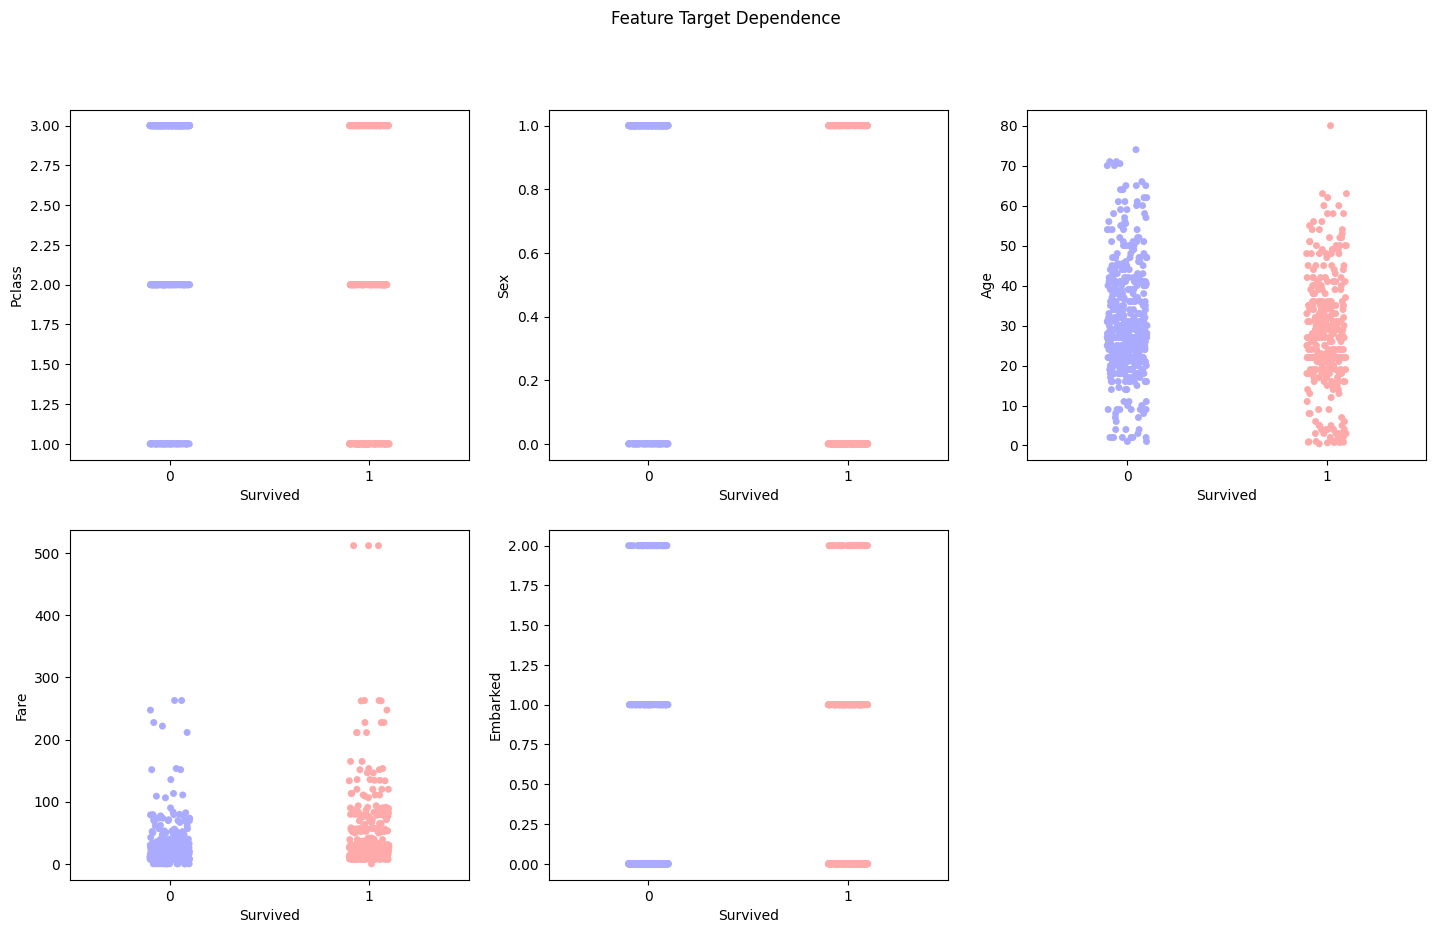

In [450]:
figure, axes = plt.subplots(2, 3, figsize = (17.5, 10))
figure.delaxes(axes[1][2])
figure.suptitle("Feature Target Dependence")


sns.stripplot(ax = axes[0, 0], data = df, x = "Survived", y = "Pclass", palette = "bwr")
sns.stripplot(ax = axes[0, 1], data = df, x = "Survived", y = "Sex", palette = "bwr")
sns.stripplot(ax = axes[0, 2], data = df, x = "Survived", y = "Age", palette = "bwr")
sns.stripplot(ax = axes[1, 0], data = df, x = "Survived", y = "Fare", palette = "bwr")
sns.stripplot(ax = axes[1, 1], data = df, x = "Survived", y = "Embarked", palette = "bwr")

## Task 2 to 5 : Implementing the Decision Tree


In [451]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        ''' constructor '''

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right

        # for leaf node
        self.value = value


In [452]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''

        # initialize the root of the tree
        self.root = None

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth

    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''

        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)

        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree)

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''

        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")

        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        # return best split
        return best_split

    def split(self, data, split_column, split_value):
      ''' function to split the data '''
      # if The data cannot be ordered, Split is made on the basis of equal to or not equal to the value
      # This implements the conToCat functionality on the Embarked Column.
      if split_column == 6:
        split_column_values = data[:, split_column]
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]


      else:
        split_column_values = data[:, split_column]
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]

      return data_below, data_above



    def information_gain(self, parent, l_child, r_child):
        ''' function to compute information gain '''

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain

    def entropy(self, y):
        ''' function to compute entropy '''

        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''

        Y = list(Y)
        return max(Y, key=Y.count)


    def fit(self, X, Y):
        ''' function to train the tree '''

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        ''' function to predict new dataset '''

        preditions = [self.infer(x, self.root) for x in X]
        return preditions

    def infer(self, x, tree):
      ''' function to predict a single data point '''

      if tree.value!=None: return tree.value
      if tree.feature_index == 6:
        feature_val = x[tree.feature_index]
        if feature_val == tree.threshold:
          return self.infer(x, tree.left)
        else:
          return self.infer(x, tree.right)
      feature_val = x[tree.feature_index]
      if feature_val<=tree.threshold:
          return self.infer(x, tree.left)
      else:
        return self.infer(x, tree.right)

## Task 6 to 8 : Testing the Decision Tree

In [453]:
def confusion_matrix(Y_test, Y_pred):
    # Assuming Y_test and Y_pred are numpy arrays or lists
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    true_negatives = 0

    for i in range(len(Y_test)):
        if Y_test[i] == 1:
            if Y_pred[i] == 1:
                true_positives += 1
            else:
                false_negatives += 1
        else:
            if Y_pred[i] == 1:
                false_positives += 1
            else:
                true_negatives += 1

    cm = [[true_positives, false_positives],
          [false_negatives, true_negatives]]

    return cm

In [454]:
def AccuracyScore(Y_test,Y_pred):
  n = len(Y_test)
  correct = 0
  for i in range(n):
    if Y_test[i] == Y_pred[i]:
      correct += 1
  return correct/n

In [455]:
def precision_per_class(Y_test, Y_pred, class_label):
    true_positives = 0
    false_positives = 0

    for i in range(len(Y_test)):
        if Y_test[i] == class_label and Y_pred[i] == class_label:
            true_positives += 1
        elif Y_test[i] != class_label and Y_pred[i] == class_label:
            false_positives += 1

    if true_positives + false_positives == 0:
        return 0  # To avoid division by zero

    precision_value = true_positives / (true_positives + false_positives)

    return round(precision_value,2)

In [456]:
def recall_per_class(Y_test, Y_pred, class_label):
    true_positives = 0
    false_negatives = 0

    for i in range(len(Y_test)):
        if Y_test[i] == class_label and Y_pred[i] == class_label:
            true_positives += 1
        elif Y_test[i] == class_label and Y_pred[i] != class_label:
            false_negatives += 1

    if true_positives + false_negatives == 0:
        return 0  # To avoid division by zero

    recall_value = true_positives / (true_positives + false_negatives)

    return round(recall_value,2)

In [457]:
def f1_score_per_class(Y_test, Y_pred, class_label):
    precision_value = precision_per_class(Y_test, Y_pred, class_label)
    recall_value = recall_per_class(Y_test, Y_pred, class_label)

    if precision_value + recall_value == 0:
        return 0  # To avoid division by zero

    f1_score_value = 2 * (precision_value * recall_value) / (precision_value + recall_value)

    return round(f1_score_value,2)

In [458]:
def support_per_class(Y_test, class_label):
    support_count = sum(1 for label in Y_test if label == class_label)
    return support_count


In [459]:
def classwise_accuracy(Y_test, Y_pred, class_label):
    correct_count = sum(1 for true_label, pred_label in zip(Y_test, Y_pred) if true_label == class_label and pred_label == class_label)
    total_count = sum(1 for true_label in Y_test if true_label == class_label)

    if total_count == 0:
        return 0  # To avoid division by zero

    accuracy_value = correct_count / total_count

    return accuracy_value

In [460]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=5)
classifier.fit(X_train,Y_train)
Y_pred_test = classifier.predict(X_test)
Y_pred_train = classifier.predict(X_train)
Y_pred_val = classifier.predict(X_val)
Y_val_normalized = Y_val.ravel()
Y_test_normalized = Y_test.ravel()
Y_train_normalized = Y_train.ravel()
print("Accuracy on the Testing data is",AccuracyScore(Y_test_normalized, Y_pred_test) * 100)
print("Accuracy on the Training data is",AccuracyScore(Y_train_normalized, Y_pred_train) * 100)
print("Accuracy on the Validation data is",AccuracyScore(Y_val_normalized, Y_pred_val) * 100)

Accuracy on the Testing data is 82.02247191011236
Accuracy on the Training data is 86.49517684887459
Accuracy on the Validation data is 79.7752808988764


In [461]:
print("Confusion Matrix: ", confusion_matrix(Y_test_normalized, Y_pred_test))
print("Precision of 'Died' Class:",precision_per_class(Y_test_normalized,Y_pred_test,class_label = 0))
print("Precision of 'Alive' Class:",precision_per_class(Y_test_normalized,Y_pred_test,class_label = 1))
print("Recall of 'Died' Class:",recall_per_class(Y_test_normalized,Y_pred_test,class_label = 0))
print("Recall of 'Alive' Class:",recall_per_class(Y_test_normalized,Y_pred_test,class_label = 1))
print("f1-score of 'Died' Class:",f1_score_per_class(Y_test_normalized,Y_pred_test,class_label = 0))
print("f1-score of 'Alive' Class:",f1_score_per_class(Y_test_normalized,Y_pred_test,class_label = 1))
print("Support of 'Died' Class:",support_per_class(Y_test_normalized,class_label = 0))
print("Support of 'Alive' Class:",support_per_class(Y_test_normalized,class_label = 1))
print("Accuracy of 'Died' Class,",classwise_accuracy(Y_test_normalized,Y_pred_test,class_label = 0)*100)
print("Accuracy of 'Alive' Class,",classwise_accuracy(Y_test_normalized,Y_pred_test,class_label = 1)*100)

Confusion Matrix:  [[22, 4], [12, 51]]
Precision of 'Died' Class: 0.81
Precision of 'Alive' Class: 0.85
Recall of 'Died' Class: 0.93
Recall of 'Alive' Class: 0.65
f1-score of 'Died' Class: 0.87
f1-score of 'Alive' Class: 0.74
Support of 'Died' Class: 55
Support of 'Alive' Class: 34
Accuracy of 'Died' Class, 92.72727272727272
Accuracy of 'Alive' Class, 64.70588235294117


In [462]:
# print(classification_report(Y_test_normalized,Y_pred_test))

# Question 2

## Task 1 : Data Exploration

In [463]:
# Load the dataset
dataset_url = "https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv"
df = pd.read_csv(dataset_url)
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


<Axes: xlabel='TV', ylabel='Sales'>

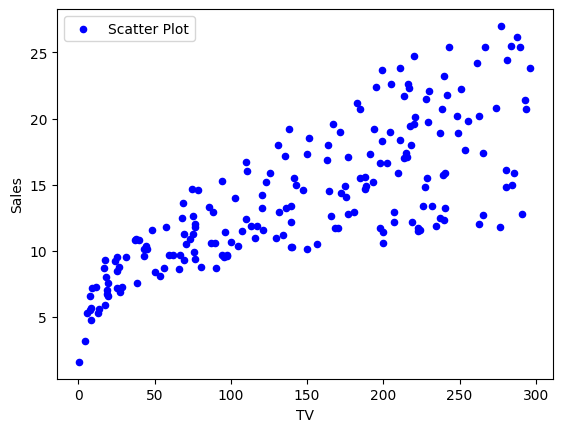

In [464]:
df.plot.scatter(x='TV', y='Sales', marker='o', color='blue', label='Scatter Plot')

We can Clearly See that the Sales Value shows a Linear Trend with the TV-Marketing Budget.

In [465]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<Axes: >

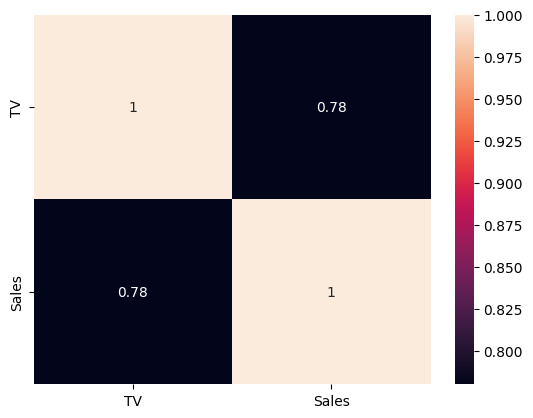

In [466]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data = correlation_matrix,annot = True)

## Task 2: Data Pre-Processing

In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [468]:
df.isna().sum()

TV       0
Sales    0
dtype: int64

We can see that there are no Missing Values in the data. So there is no need to drop anyting.

Now we Normalize the data using Z-Score Normalization

In [469]:
def z_score_normalization(data):
    # Calculate mean and standard deviation for each column
    means = data['TV'].mean()
    stds = data['TV'].std()

    # Z Score Normalization
    data['TV'] = (data['TV'] - means) / stds

    return data

In [470]:
df = z_score_normalization(df)
df.head()

,TV,Sales
0,0.967425,22.1
1,-1.194379,10.4
2,-1.512360,9.3
3,0.051919,18.5
4,0.393196,12.9


We Split the Data into Training and Testing Sets using 80-20 Split.

In [471]:
def train_test_split_(df, test_size):

    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)

    return train_df, test_df

In [472]:
train_df,test_df = train_test_split_(df,test_size = 0.2)

## Task 3 : Implementing Linear Regression

Function to implement Gradient Descent for Linear Regression.

In [473]:
def GetBestFit(data,learning_rate = 0.001,epochs = 1000):
  m = 1
  c = 0
  y_values = data['Sales']
  x_values = data['TV']

  for _ in range(epochs):
    y_hat = m*x_values + c
    slope_gradient = -np.sum((y_values - y_hat)*x_values)
    intercept_gradient = -np.sum(y_values - y_hat)

    m = m - learning_rate*slope_gradient
    c = c - learning_rate*intercept_gradient

  return m,c

Printing Slope and Intercept Values of the obtained Fit.

In [474]:
slope,intercept = GetBestFit(train_df)
print(slope)
print(intercept)

4.005130747749911
13.818704485416633


Plotting the best fit along with the scatter plot of the data.

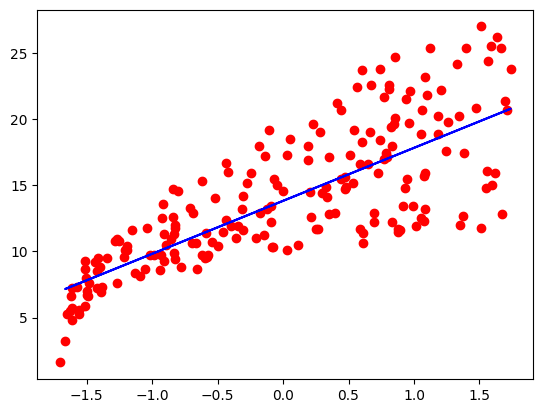

In [475]:
x_values = train_df['TV']
y_values = slope*x_values + intercept
plt.plot(x_values, y_values, label=f'y = {slope}x + {intercept}', color='blue')
plt.scatter(df['TV'], df['Sales'], color='red', marker='o', label='Data Points')

## Task 4 :Evaluating the Model.

In [476]:
def MeanSquaredError(y_test,y_pred):
  return np.mean((y_test - y_pred)**2)

def MeanAbsoluteError(y_test,y_pred):
  return np.mean((np.abs(y_test - y_pred)))

In [477]:
y_test = test_df['Sales']
x_test = test_df['TV']
y_pred = slope*x_test + intercept
mse = MeanSquaredError(y_test,y_pred)
mae = MeanAbsoluteError(y_test,y_pred)
print("Mean Squared Error =",mse)
print("Mean Absolute Error =",mae)

Mean Squared Error = 13.660771747919403
Mean Absolute Error = 2.933078434764753


# Question 3

## Task 1 : Dataset Exploration

In [478]:
data = pd.read_csv("http://lib.stat.cmu.edu/datasets/boston", sep="\s+", skiprows=22,header=None)

In [479]:
X3 = np.hstack([data.values[::2, :], data.values[1::2, :2]])
y3 = data.values[1::2,2]

In [480]:
df3 = pd.DataFrame({'CRIM':X3[:,0], 'ZN':X3[:,1], 'INDUS':X3[:,2], 'CHAS':X3[:,3], 'NOX':X3[:,4], 'RM':X3[:,5], 'AGE':X3[:,6], 'DIS':X3[:,7], 'RAD':X3[:,8], 'TAX':X3[:,9], 'PTRATIO':X3[:,10], 'B':X3[:,11], 'LSTAT':X3[:,12], 'MEDV':y3})
df3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [481]:
df3.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Task 2 : Data Pre-Processing

<Axes: >

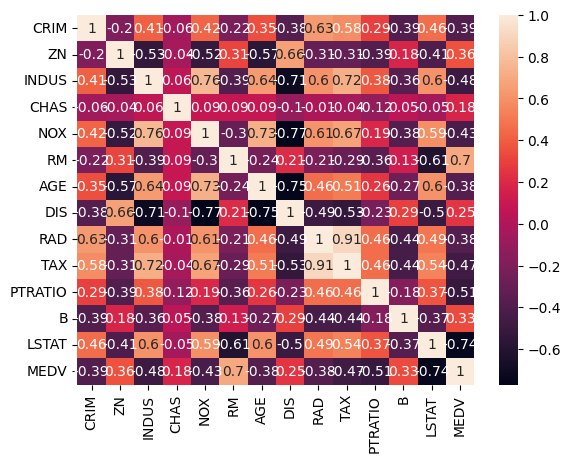

In [482]:
# sns.heatmap(df3)
correlation_matrix = df3.corr().round(2)
sns.heatmap(data = correlation_matrix,annot = True)

In [483]:
df3.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no missing values in the data. Hence no dropping of data is required

In [484]:
X = df3.drop(columns = ['MEDV'])
X = (X - X.mean())/X.std()
y = df3['MEDV']

In [485]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state = 13)

## Task 3: Implementing Multiple Linear Regression.

In [486]:
class MultipleLinearRegressor:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        num_samples, num_features = X.shape
        self.weights = np.ones(num_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.num_iterations):
            # Predicted values
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1/num_samples) * np.dot(X.T, (y_pred - y))
            db = (1/num_samples) * np.sum(y_pred - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## Task 4 : Evaluating the Model.

In [487]:
Regressor = MultipleLinearRegressor()
Regressor.fit(X_train,Y_train)
y_pred = Regressor.predict(X_test)
# type(Y_test)
Y_test_normal = np.array(list(Y_test))
mse = MeanSquaredError(Y_test_normal,y_pred)
mae = MeanAbsoluteError(Y_test_normal,y_pred)
print("Mean Squared Error =",mse)
print("Mean Absolute Error =",mae)

Mean Squared Error = 23.59084704575107
Mean Absolute Error = 3.473453799113906
